In [28]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [11]:
image_dir = "images_test"

target_size = (512, 512)

for filename in os.listdir(image_dir):
    file_path = os.path.join(image_dir, filename)
    
    image = Image.open(file_path)
    resized_image = image.resize(target_size, Image.ANTIALIAS)
        
    resized_image.save(file_path)

<ipython-input-11-78db6fcaca8a>:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize(target_size, Image.ANTIALIAS)


In [7]:
import sys
import os
import pandas as pd
from PyQt5.QtWidgets import QApplication, QMainWindow, QLabel, QPushButton, QVBoxLayout, QHBoxLayout, QWidget, QSlider
from PyQt5.QtGui import QPixmap
from PyQt5.QtCore import Qt

from os import environ

def suppress_qt_warnings():
    environ["QT_DEVICE_PIXEL_RATIO"] = "0"
    environ["QT_AUTO_SCREEN_SCALE_FACTOR"] = "1"
    environ["QT_SCREEN_SCALE_FACTORS"] = "1"
    environ["QT_SCALE_FACTOR"] = "1"
    
class ImageViewer(QMainWindow):
    def __init__(self, image_dir):
        super().__init__()
        self.image_dir = image_dir
        self.image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpeg')]
        self.current_index = 0
        self.rating_map = {image_file: [0, 0, 0, 0] for image_file in self.image_files}
        self.csv_file = 'test_dataset_markup.csv'
        
        self.initUI()
        self.load_or_create_csv()
    
    def initUI(self):
        self.setGeometry(100, 100, 600, 600)
        self.setWindowTitle('Image Viewer')
        
        layout = QVBoxLayout()
        
        self.image_label = QLabel(self)
        layout.addWidget(self.image_label)
        
        self.slider_layout = QVBoxLayout()
        self.sliders = []
        for criteria in ["Эмоциональная окраска", "Сложность сюжета", "Интересность", "Качество исполнения"]:
            slider_layout = QHBoxLayout()
            label = QLabel(criteria)
            slider_layout.addWidget(label)
            slider = QSlider()
            slider.setOrientation(Qt.Horizontal)
            slider.setMinimum(0)
            slider.setMaximum(10)
            slider.setTickInterval(1)
            slider.setTickPosition(QSlider.TicksBelow)
            slider_layout.addWidget(slider)
            self.sliders.append(slider)
            slider.valueChanged.connect(lambda value, index=len(self.sliders)-1, self=self: self.update_ratings(index, value))  # Исправлено передача аргументов
            self.slider_layout.addLayout(slider_layout)

        layout.addLayout(self.slider_layout)
        
        button_layout = QHBoxLayout()
        self.btn_prev = QPushButton('Previous')
        self.btn_prev.clicked.connect(self.prev_image)
        button_layout.addWidget(self.btn_prev)
        
        self.btn_next = QPushButton('Next')
        self.btn_next.clicked.connect(self.next_image)
        button_layout.addWidget(self.btn_next)
        
        layout.addLayout(button_layout)
        
        central_widget = QWidget()
        central_widget.setLayout(layout)
        self.setCentralWidget(central_widget)
        
        self.update_image()
        
    def update_image(self):
        image_path = os.path.join(self.image_dir, self.image_files[self.current_index])
        pixmap = QPixmap(image_path)
        self.image_label.setPixmap(pixmap)
        self.setWindowTitle(os.path.splitext(self.image_files[self.current_index])[0])
        
        # Устанавливаем значения слайдеров на основе карты оценок
        if self.image_files[self.current_index] in self.rating_map:
            ratings = self.rating_map[self.image_files[self.current_index]]
            for i, slider in enumerate(self.sliders):
                slider.setValue(ratings[i])
        
    def update_ratings(self, index, value):
        self.rating_map[self.image_files[self.current_index]][index] = value
        self.save_to_csv()  # Сохраняем в CSV при изменении оценок
        
    def next_image(self):
        self.current_index = (self.current_index + 1) % len(self.image_files)
        self.update_image()
        
    def prev_image(self):
        self.current_index = (self.current_index - 1) % len(self.image_files)
        self.update_image()
        
    def load_or_create_csv(self):
        if os.path.exists(self.csv_file):
            df = pd.read_csv(self.csv_file)
            for idx, row in df.iterrows():
                image_path = row['Image_path']
                if image_path in self.image_files:
                    ratings = [row['Emotional_coloring'], row['Plot_complexity'], row['Interest'], row['Sound_quality']]
                    self.rating_map[image_path] = ratings
        
        self.update_image()  # Обновляем изображение после загрузки оценок
    
    def save_to_csv(self):
        df = pd.DataFrame.from_dict(self.rating_map, orient='index', columns=['Emotional_coloring', 'Plot_complexity', 'Interest', 'Sound_quality'])
        df.index.name = 'Image_path'
        df.reset_index(inplace=True)
        df.to_csv(self.csv_file, index=False)

if __name__ == '__main__':
    suppress_qt_warnings()
    app = QApplication(sys.argv)  
    image_dir = "images_test"
    viewer = ImageViewer(image_dir)
    viewer.show()
    sys.exit(app.exec_())

SystemExit: 0

c:\users\sergeysaber\pyver\py392\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [12]:
df = pd.read_csv('test_dataset_markup.csv')

print(df.head(50))

                   Image_path  Emotional_coloring  Plot_complexity  Interest  \
0      картины войны_001.jpeg                   3                9         5   
1      картины войны_002.jpeg                   5                9         4   
2      картины войны_003.jpeg                   5                9         4   
3     картины женщин_001.jpeg                   9                0         9   
4     картины женщин_002.jpeg                   7                0         4   
5     картины женщин_003.jpeg                   9                0         9   
6   картины животных_001.jpeg                   2                0         0   
7   картины животных_002.jpeg                   3                0         0   
8   картины животных_003.jpeg                   3                0         0   
9    картины фруктов_001.jpeg                   3                0         0   
10   картины фруктов_002.jpeg                   3                0         0   
11   картины фруктов_003.jpeg           

In [13]:
from tensorflow.keras.models import load_model

In [19]:
def data_generator(image_paths, labels, batch_size=4):
    index = 0
    indices = np.random.permutation(len(image_paths))
    image_paths = np.array(image_paths)[indices]
    labels = labels[indices]
    num_images = len(image_paths)

    
    while True:
        if index >= num_images:
            break  
        
        for i in range(0, len(image_paths), batch_size):
            batch_paths = image_paths[i:i+batch_size]
            batch_images = [tf.keras.preprocessing.image.load_img(path, target_size=(512, 512)) for path in batch_paths]
            batch_images = [tf.keras.preprocessing.image.img_to_array(img) for img in batch_images]
            batch_images = np.array(batch_images) / 255.0 
            batch_labels = labels[i:i+batch_size]
            
            index += batch_size
            
            yield batch_images, batch_labels


In [15]:
model = load_model('paintings_model.h5')

In [16]:
image_paths = df['Image_path'].tolist()
image_paths = [os.path.join(image_dir, filename) for filename in image_paths]
labels = df[['Emotional_coloring', 'Plot_complexity', 'Interest', 'Sound_quality']].values
batch_size=4

In [20]:
test_generator = data_generator(image_paths, labels)

In [21]:
loss, accuracy = model.evaluate(test_generator)

3/3 [==============================] - 1s 115ms/step - loss: 9.4968 - mae: 2.3042


In [22]:
print(loss, accuracy)

9.496787071228027 2.3042256832122803


In [42]:
image_paths = image_paths = [os.path.join(image_dir, filename) for filename in df['Image_path']]
labels = df[['Emotional_coloring', 'Plot_complexity', 'Interest', 'Sound_quality']]

images = []
for path in image_paths:
    image = load_img(path, target_size=(512, 512))
    image = img_to_array(image) / 255.0
    images.append(image)
images = np.array(images)

predicted_scores = model.predict(images)

1/1 [==============================] - 0s 42ms/step


In [43]:
print(predicted_scores)

[[ 2.856876    2.7765594   1.0944138   3.1481442 ]
 [ 2.6287081   3.0199037   0.8363962   2.9362066 ]
 [ 4.8484225   5.4677787  -0.13868265  5.4910307 ]
 [ 1.4189968   0.67581403  0.8744766   2.6197314 ]
 [ 2.5680726   2.4081295   1.4025768   6.2451735 ]
 [ 3.4976914   1.4905971   4.3733425   4.3511696 ]
 [ 2.981903    1.746828    3.0947664   3.413825  ]
 [ 2.55007     1.2051506   0.36826655  2.7937505 ]
 [ 2.8981454  -0.17362514  1.5802231   3.7139306 ]
 [ 1.1510727   0.8992647   1.590963    4.2244015 ]
 [ 2.0188963   2.3176823   1.6151633   3.8421135 ]
 [ 2.1816075   2.8060682   0.99506253  3.4767158 ]]


In [46]:
predicted_scores = np.ceil(predicted_scores).astype(int)
predicted_scores = np.maximum(predicted_scores, 0)

In [51]:
def plot_images_with_scores(images, original_scores, predicted_scores):
    num_rows = 2
    num_cols = len(images) // 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6))

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_xticks([])
        ax.set_yticks([])
        title = f"Original: {original_scores.iloc[i].values}\nPredicted: {predicted_scores[i]}"

        ax.set_title(title)

    fig.suptitle("Images with Original and Predicted Scores\nЭмоциональная окраска, Сложность сюжета, Интересность, Качество исполнения", fontsize=16)
    plt.tight_layout()
    plt.savefig('images_with_scores.png')  # Сохранение как PNG
    plt.show()

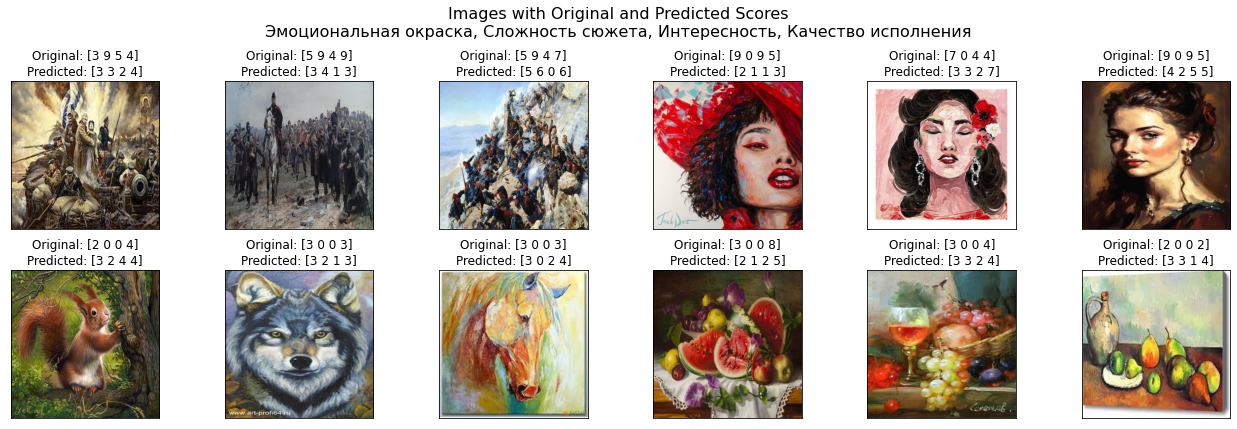

In [52]:
plot_images_with_scores(images, labels, predicted_scores)